In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored as cl
from matplotlib import style
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from keras import models,layers,losses,optimizers
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
rdata = pd.read_csv('LessFeature.csv')
del rdata['Unnamed: 0']
x = rdata.drop('default', axis=1)
y = rdata['default']
rdata.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_in9,BILL_AMT9,PAY_AMT9,default
count,26556.000000,26556.000000,26556.000000,26556.000000,26556.000000,26556.000000,26556.000000,26556.000000,26556.000000
mean,159652.571170,1.594969,1.822375,1.541309,35.235804,0.184516,55221.449842,5548.885826,0.231963
std,127331.718311,0.490907,0.695715,0.501839,9.216976,0.979201,75220.997219,15225.270168,0.422093
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-1.000000,-165580.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,5745.000000,1099.000000,0.000000
50%,130000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,27269.000000,2200.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,1.000000,73008.000000,5006.250000,0.000000
max,1000000.000000,2.000000,3.000000,2.000000,79.000000,8.000000,964511.000000,505000.000000,1.000000


In [3]:
Allmodel_acc = {}
x.values

array([[ 20000,      2,      2, ...,      2,   3913,      0],
       [120000,      2,      2, ...,     -1,   2682,      0],
       [ 90000,      2,      2, ...,      0,  29239,   1518],
       ...,
       [ 30000,      1,      2, ...,      4,   3565,      0],
       [ 80000,      1,      3, ...,      1,  -1645,  85900],
       [ 50000,      1,      2, ...,      0,  47929,   2078]], dtype=int64)

In [4]:
data = pd.read_csv('LessSample.csv')
del data['Unnamed: 0']
X = data.drop('default', axis=1)
Y = data['default']
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_in9,PAY_in8,PAY_in7,PAY_in6,PAY_in5,...,BILL_AMT6,BILL_AMT5,BILL_AMT4,PAY_AMT9,PAY_AMT8,PAY_AMT7,PAY_AMT6,PAY_AMT5,PAY_AMT4,default
count,26556.000000,26556.000000,26556.000000,26556.000000,26556.000000,26556.000000,26556.000000,26556.000000,26556.000000,26556.000000,...,26556.000000,26556.000000,26556.000000,26556.000000,2.655600e+04,26556.000000,26556.000000,26556.000000,26556.000000,26556.000000
mean,159652.571170,1.594969,1.822375,1.541309,35.235804,0.184516,0.049895,0.003163,-0.063263,-0.117036,...,46584.412186,43389.460574,41843.978875,5548.885826,5.625862e+03,5068.191106,4679.264008,4654.880705,5045.284870,0.231963
std,127331.718311,0.490907,0.695715,0.501839,9.216976,0.979201,1.105929,1.118774,1.099900,1.068793,...,65851.897976,62307.650057,61020.759400,15225.270168,1.901492e+04,16527.467365,14857.767322,14587.841866,17233.527506,0.422093
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,4010.500000,3022.750000,2171.750000,1099.000000,1.000000e+03,502.000000,367.000000,350.000000,264.000000,0.000000
50%,130000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21395.500000,19741.500000,19248.000000,2200.000000,2.062000e+03,1917.000000,1541.000000,1600.000000,1504.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,59869.250000,55275.250000,52790.250000,5006.250000,5.000000e+03,4500.000000,4014.000000,4036.250000,4000.000000,0.000000
max,1000000.000000,2.000000,3.000000,2.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.227082e+06,896040.000000,528897.000000,426529.000000,528666.000000,1.000000


In [5]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

In [6]:
def ratio(data):
    tran = data.transpose()
    tran = tran/sum(tran)
    return  tran.transpose()

In [22]:
x1 = x.copy()
for i in x.columns:
    x1[i] = normalization(x1[i])

In [23]:
x_train, x_test, y_train,y_test = train_test_split(x1,y,test_size = 0.2,random_state=42)
print('Train set shape:',x_train.shape,y_train.shape)
print('Test set shape:',x_test.shape,y_test.shape)


Train set shape: (21244, 8) (21244,)
Test set shape: (5312, 8) (5312,)


Text(0, 0.5, 'accuracy(%)')

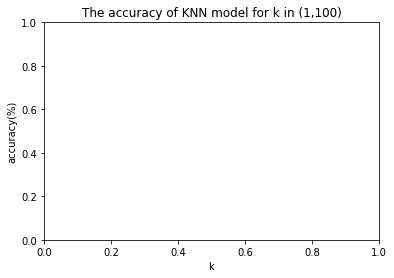

In [24]:
max = 0
knum = 0
for i in range(100,100):
    Knnclf = KNeighborsClassifier(n_neighbors=i)
    Knnclf.fit(x_train,y_train)
    Knnclf
    y_pred = Knnclf.predict(x_test)
    acc = round(accuracy_score(y_test,y_pred)*100,2)
    plt.scatter(x = i, y=acc, color = 'Red')
    if acc > max:
        max = acc
        knum = i
    # print("Prediction Accuracy Score(%):",acc,"k = ", i)
plt.title("The accuracy of KNN model for k in (1,100)")
plt.xlabel("k")
plt.ylabel("accuracy(%)")
# plt.savefig("KNN_acc.jpeg")

In [25]:
print("Prediction Accuracy best Score(%):",max,"k = ", knum)
scores1 = cross_val_score(Knnclf, x, y)
Allmodel_acc['KNN'] = round(scores1.mean(),4)
scores1.mean()

Prediction Accuracy best Score(%): 0 k =  0


0.7677361276210093

In [10]:
Knnclf = KNeighborsClassifier(n_neighbors=63)
Knnclf.fit(x_train,y_train)
plt.figure(figsize=(4,3))

ConfMatrix = confusion_matrix(y_test,Knnclf.predict(x_test))
sns.heatmap(ConfMatrix,annot=True,
            cmap="Blues",
            fmt="d",
            xticklabels = ['Non-default', 'Default'],
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - KNN");
# plt.savefig("KNN_conf.jpeg")




NameError: name 'x_train' is not defined

In [37]:
ratio(ConfMatrix)

array([[0.96118389, 0.03881611],
       [0.68319328, 0.31680672]])

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify = y,random_state=42)

In [12]:
tree = DecisionTreeClassifier(max_depth=5,min_samples_split=2,random_state=42)
clf = tree.fit(x_train,y_train)
scores2 = cross_val_score(tree,x,y)
Allmodel_acc['Decision'] = round(scores2.mean(),4)
scores2.mean()

0.8138278944246201

In [13]:
print("Accuracy  on training set: {:.3f}".format(tree.score(x_train,y_train)))
print("Accuracy  on test set: {:.3f}".format(tree.score(x_test,y_test)))

Accuracy  on training set: 0.817
Accuracy  on test set: 0.815


depth =  1
Accuracy  on training set: 0.814
Accuracy  on test set: 0.815
depth =  2
Accuracy  on training set: 0.815
Accuracy  on test set: 0.815
depth =  3
Accuracy  on training set: 0.815
Accuracy  on test set: 0.816
depth =  4
Accuracy  on training set: 0.816
Accuracy  on test set: 0.814
depth =  5
Accuracy  on training set: 0.817
Accuracy  on test set: 0.815
depth =  6
Accuracy  on training set: 0.819
Accuracy  on test set: 0.813
depth =  7
Accuracy  on training set: 0.823
Accuracy  on test set: 0.812
depth =  8
Accuracy  on training set: 0.827
Accuracy  on test set: 0.810
depth =  9
Accuracy  on training set: 0.834
Accuracy  on test set: 0.807
depth =  10
Accuracy  on training set: 0.840
Accuracy  on test set: 0.801
depth =  11
Accuracy  on training set: 0.848
Accuracy  on test set: 0.800
depth =  12
Accuracy  on training set: 0.857
Accuracy  on test set: 0.795
depth =  13
Accuracy  on training set: 0.867
Accuracy  on test set: 0.786
depth =  14
Accuracy  on training set: 0.880
Ac

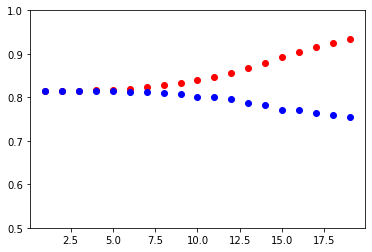

In [46]:
for i in range(1,20):
    tree = DecisionTreeClassifier(max_depth=i,min_samples_split=2,random_state=42)
    clf = tree.fit(x_train,y_train)
    scores2 = cross_val_score(tree,x,y)
    scores2.mean()
    trainacc = tree.score(x_train,y_train)
    testacc = tree.score(x_test,y_test)
    plt.scatter(x = i, y=trainacc, color = 'Red')
    plt.scatter(x = i,y = testacc, color = 'Blue')
    print("depth = ",i)
    print("Accuracy  on training set: {:.3f}".format(tree.score(x_train,y_train)))
    print("Accuracy  on test set: {:.3f}".format(tree.score(x_test,y_test)))
plt.ylim(0.5,1)
# plt.savefig("Decision_acc.jpeg")

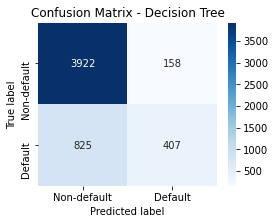

In [16]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,tree.predict(x_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d",
            xticklabels = ['Non-default', 'Default'],
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree");
# plt.savefig("DecisionTree_conf.jpeg")

In [14]:
import os
import graphviz
from  sklearn.tree import export_graphviz
export_graphviz(tree,out_file="tree.dot",
                class_names=["default","Non_default"],
                feature_names=['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_in9','BILL_AMT9','PAY_AMT9'],
                impurity=False,filled=True)
graph = graphviz.Source('tree.dot')

dot_data = export_graphviz(clf, out_file=None,class_names=["default","Non_default"])
graph = graphviz.Source(dot_data)
os.environ["PATH"] += os.pathsep + 'C:\Program files(X86)\Graphviz\bin'
graph.render("test", view=True)



'test.pdf'

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify = y,random_state=42)

Rfclf = RandomForestClassifier(n_estimators=161,
                               n_jobs=-1,
                               min_samples_split=2,
                               random_state=90)
Rfclf.fit(x_train,y_train)
scores3 = cross_val_score(Rfclf, x, y)
Allmodel_acc['Random Forest'] = round(scores3.mean(),4)
print(scores3.mean())

0.8040372703391234


In [27]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,x,y,cv=10).mean()
    scorel.append(score)

0.804603356930547 161


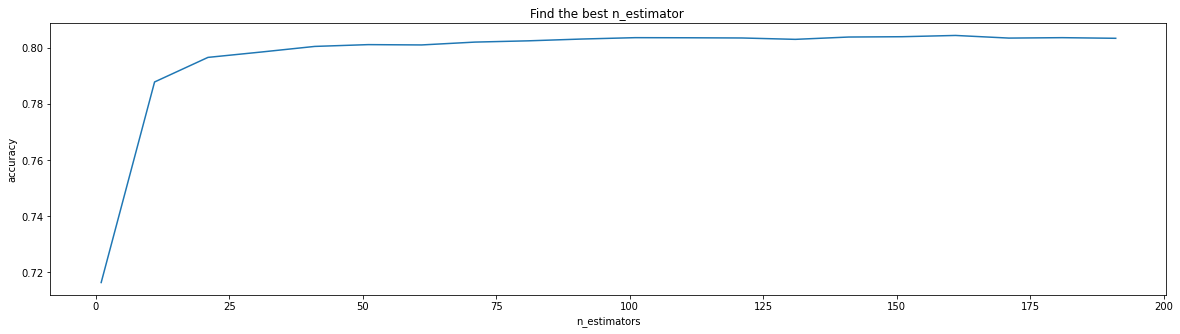

In [29]:
print(np.max(scorel),(scorel.index(np.max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.title("Find the best n_estimator ")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.savefig("RF200n.jpeg")
plt.show()

0.8126617061466204

In [32]:
importance = Rfclf.feature_importances_
print("重要性: ")

feat_label = X.columns[:]
indices = np.argsort(importance)[::-1]
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_label[indices[f]],
                            importance[indices[f]]))

重要性: 
 1) PAY_in9                        0.097565
 2) AGE                            0.064723
 3) BILL_AMT9                      0.061600
 4) LIMIT_BAL                      0.057172
 5) BILL_AMT8                      0.055916
 6) PAY_AMT9                       0.052555
 7) BILL_AMT7                      0.052045
 8) BILL_AMT4                      0.051652
 9) BILL_AMT5                      0.050868
10) BILL_AMT6                      0.050543
11) PAY_in8                        0.048664
12) PAY_AMT8                       0.047940
13) PAY_AMT4                       0.046380
14) PAY_AMT7                       0.045777
15) PAY_AMT5                       0.044989
16) PAY_AMT6                       0.043003
17) PAY_in7                        0.025618
18) PAY_in6                        0.022908
19) PAY_in5                        0.020802
20) EDUCATION                      0.017995
21) PAY_in4                        0.017773
22) SEX                            0.012141
23) MARRIAGE              

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

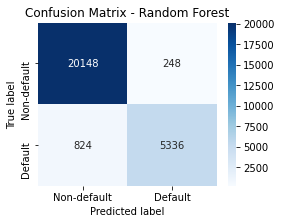

In [18]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y,Rfclf.predict(x))
sns.heatmap(
            # ratio(ConfMatrix),
            ConfMatrix,
            annot=True,
            cmap="Blues",
            fmt="d",
            xticklabels = ['Non-default', 'Default'],
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");
# plt.savefig("RF_conf_total.jpeg")

array([[0.9889194 , 0.0110806 ],
       [0.12694805, 0.87305195]])

<Figure size 432x288 with 0 Axes>

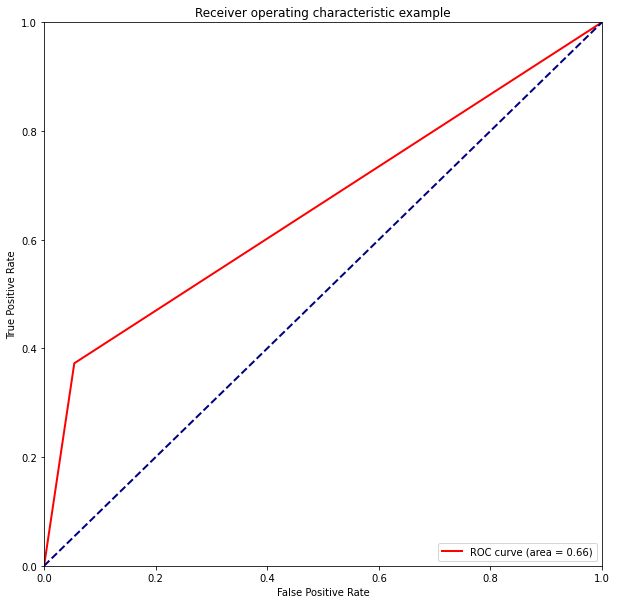

In [34]:
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, Rfclf.predict(x_test)) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='Red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [233]:
x.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_in9,BILL_AMT9,PAY_AMT9
count,26556.000000,26556.000000,26556.000000,26556.000000,26556.000000,26556.000000,26556.000000,26556.000000
mean,159652.571170,1.594969,1.822375,1.541309,35.235804,0.184516,55221.449842,5548.885826
std,127331.718311,0.490907,0.695715,0.501839,9.216976,0.979201,75220.997219,15225.270168
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-1.000000,-165580.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,5745.000000,1099.000000
50%,130000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,27269.000000,2200.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,1.000000,73008.000000,5006.250000
max,1000000.000000,2.000000,3.000000,2.000000,79.000000,8.000000,964511.000000,505000.000000


In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=42)

gbclf = GaussianNB();
gbclf.fit(x_train,y_train)
y_pred_g = gbclf.predict(x_test)
print('The accuracy of the GaussianNB for Test Set is: %d%%' %
      (gbclf.score(x_test,y_test)*100))

scores4 = cross_val_score(gbclf, x, y)
Allmodel_acc['Naive Bayes'] = round(scores4.mean(),4)
print(scores4.mean())

The accuracy of the GaussianNB for Test Set is: 77%
0.7654014712587878


In [17]:
y_proba = gbclf.predict_proba(x_test[:1])
print(x_test[:1])
print(gbclf.predict(x_test[:1]))
print("预计的概率值:", y_proba)

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_in9  BILL_AMT9  PAY_AMT9
10124      50000    2          2         1   34        0      40798      2000
[0]
预计的概率值: [[0.60092495 0.39907505]]


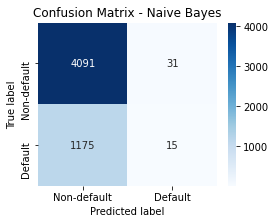

In [18]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,gbclf.predict(x_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d",
            xticklabels = ['Non-default', 'Default'],
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Naive Bayes");
plt.savefig("Naive Bayes_conf.jpeg")

In [19]:
# news.target_names

print("每个类别的精确率和召回率：")
print(classification_report(y_test, y_pred_g, target_names=['non_default','default']))

每个类别的精确率和召回率：
              precision    recall  f1-score   support

 non_default       0.78      0.99      0.87      4122
     default       0.33      0.01      0.02      1190

    accuracy                           0.77      5312
   macro avg       0.55      0.50      0.45      5312
weighted avg       0.68      0.77      0.68      5312



In [213]:
x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=42)
Nor = StandardScaler()
x_train = Nor.fit_transform( x_train )
x_test = Nor.transform( x_test )

In [214]:
classifier1 = SVC(kernel="rbf")
classifier1.fit( x_train, y_train )
y_pred = classifier1.predict( x_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for kernel-SVM = %.4f" %
      ((cm[0,0] + cm[1,1] )/len(x_test)))
scores5 = cross_val_score( classifier1, x, y)
Allmodel_acc['SVM'] = round(scores5.mean(),4)
print("Mean kernel-SVM CrossVal Accuracy on Train Set %.2f, with std=%.2f" %
      (scores5.mean(), scores5.std() ))

Accuracy on Test Set for kernel-SVM = 0.8185
Mean kernel-SVM CrossVal Accuracy on Train Set 0.77, with std=0.00


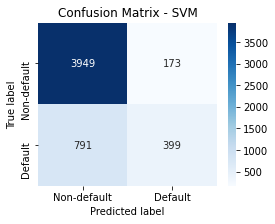

In [215]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,classifier1.predict(x_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d",
            xticklabels = ['Non-default', 'Default'],
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - SVM");
plt.savefig("SVM_conf.jpeg")

In [26]:

# 交叉检验结果  5
for i in Allmodel_acc.keys():
    print(i, Allmodel_acc[i])

Decision 0.8138
Random Forest 0.804
Naive Bayes 0.7654
KNN 0.7677


In [27]:
from sklearn.ensemble import VotingClassifier

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

estimator = [
    # ('KNN',Knnclf),
             ('Decision',clf),
             ('Random',Rfclf),
             ('Naive',gbclf)
             ]
ensemble = VotingClassifier(estimator,voting='soft')

ensemble.fit(x_train,y_train)
ensemble.score(x_test,y_test)

# D R N 0.817 SOFT
# D R L .816 HARD

0.8170180722891566

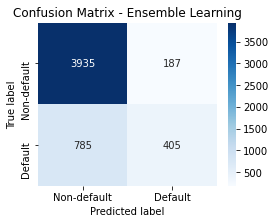

In [28]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,ensemble.predict(x_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d",
            xticklabels = ['Non-default', 'Default'],
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Ensemble Learning");
plt.savefig("EL_conf.jpeg")




In [16]:
import keras
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.python.keras import layers, models
from keras.preprocessing import sequence
from keras.datasets import imdb
from keras.datasets import mnist

In [127]:
del X['SEX']

In [135]:
train_data,test_data,train_labels,test_labels = train_test_split(
    np.array(X),np.array(Y),test_size=0.2,random_state=0)
x_train = Nor.fit_transform( x_train )
x_test = Nor.transform( x_test )
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(22,activation = 'ReLU',
                           input_shape = (len(train_data[0]),)))
    model.add(layers.Dense(44,activation='ReLU'))
    model.add(layers.Dense(88,activation='ReLU'))
    model.add(layers.Dense(88,activation='ReLU'))
    model.add(layers.Dense(44,activation='ReLU'))
    # model.add(layers.Dense(22,activation='ReLU'))
    model.add(layers.Dense(11,activation='ReLU'))
    model.add(layers.Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
    return model

In [42]:
x2 = x.copy()
for i in x.columns:
    x2[i] = normalization(x2[i])
x2 = x2.values
train_data,test_data,train_labels,test_labels = train_test_split(
    x2,y,test_size=0.2,random_state=0)
# train_data = Nor.fit_transform( train_data )
# test_data = Nor.transform( test_data )
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(8,activation = 'ReLU',
                           input_shape = (len(train_data[0]),)))
    model.add(layers.Dense(16,activation='ReLU'))
    model.add(layers.Dense(32,activation='ReLU'))
    model.add(layers.Dense(64,activation='ReLU'))
    model.add(layers.Dense(32,activation='ReLU'))
    model.add(layers.Dense(16,activation='ReLU'))
    model.add(layers.Dense(8,activation='ReLU'))
    model.add(layers.Dense(4,activation='ReLU'))
    model.add(layers.Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
    return model

In [43]:
model = build_model()
x_train = train_data
y_train = train_labels
x_val = test_data
y_val = test_labels
history = model.fit(x_train,y_train,
                    epochs=200,
                    batch_size=128,
                    validation_data=(x_val,y_val))

Epoch 1/200
166/166 [==============================] - 15s 7ms/step - loss: 0.6068 - accuracy: 0.7305 - val_loss: 0.4862 - val_accuracy: 0.7743
Epoch 2/200
166/166 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.7884 - val_loss: 0.4548 - val_accuracy: 0.8170
Epoch 3/200
166/166 [==============================] - 0s 1ms/step - loss: 0.4654 - accuracy: 0.8098 - val_loss: 0.4494 - val_ac

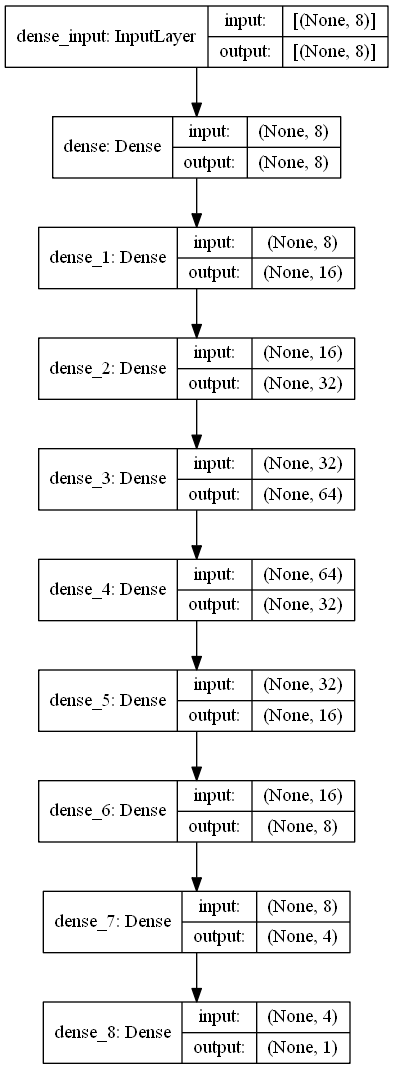

In [44]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model1.png', show_shapes=True)

In [19]:
# predict_labels = model.predict(test_data)
evaluate = model.evaluate(test_data,test_labels)
Allmodel_acc['Neural Network'] = round(evaluate[1],4)
print("损失值与准确率：")
print(evaluate)

166/166 [==============================] - 0s 756us/step - loss: 0.4362 - accuracy: 0.8210
损失值与准确率：
[0.4361630082130432, 0.8209713697433472]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<Figure size 720x720 with 0 Axes>

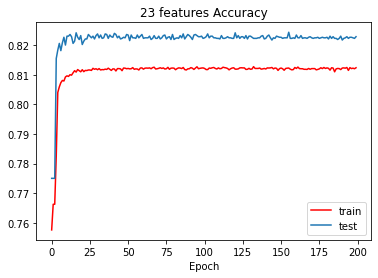

<Figure size 720x720 with 0 Axes>

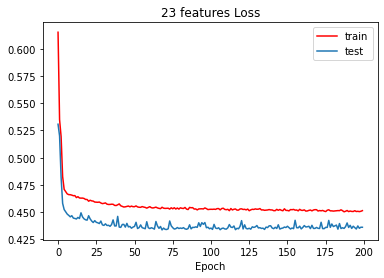

In [299]:
print(history.history.keys())
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
loss = history.history['loss']
val_loss =history.history['val_loss']

plt.figure(figsize=(10,10))
ax = plt.figure().add_subplot()
plt.title("23 features Accuracy")
plt.xlabel("Epoch")
ax.plot(range(len(acc)),acc,color = 'Red')
ax.plot(range(len(acc)),acc_val)
plt.legend(labels = ['train', 'test'], loc = 'best')
# plt.savefig('23acc200.jpeg')

plt.figure(figsize=(10,10))
ax1 = plt.figure().add_subplot()
plt.title("23 features Loss")
plt.xlabel("Epoch")
ax1.plot(range(len(loss)),loss,color = 'Red')
ax1.plot(range(len(val_loss)),val_loss)
plt.legend(labels = ['train', 'test'], loc = 'best')
# plt.savefig('23loss200.jpeg')

In [21]:
model_train = build_model()
model_train.fit(train_data,train_labels,epochs =100, batch_size=128)

Epoch 1/100
166/166 [==============================] - 1s 822us/step - loss: 0.5626 - accuracy: 0.7661
Epoch 2/100
166/166 [==============================] - 0s 792us/step - loss: 0.5033 - accuracy: 0.7744
Epoch 3/100
166/166 [==============================] - 0s 889us/step - loss: 0.4705 - accuracy: 0.8055

In [22]:
predict_labels = model_train.predict(test_data)
print("预测标签：")
print(predict_labels)
evaluate = model_train.evaluate(test_data,test_labels)
print("损失值与准确率：")
print(evaluate)

预测标签：
[[0.3663113 ]
 [0.20855075]
 [0.11778572]
 ...
 [0.12191644]
 [0.37546673]
 [0.04108262]]
166/166 [==============================] - 0s 471us/step - loss: 0.4346 - accuracy: 0.8217
损失值与准确率：
[0.4346024990081787, 0.8217244148254395]


f:\python3.9.2\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


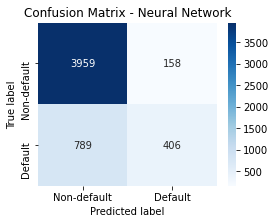

In [23]:
plt.figure(figsize=(4,3))
predict_labels = model_train.predict_classes(test_data)
ConfMatrix = confusion_matrix(y_true=test_labels,
                              y_pred=predict_labels)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d",
            xticklabels = ['Non-default', 'Default'],
            yticklabels = ['Non-default', 'Default'],
            )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Neural Network");
plt.savefig("NN_conf.jpeg")

f:\python3.9.2\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


608

In [ ]:
# scores5 = cross_val_score(BPclf,x,y)
# scores5.mean()

In [ ]:
X.describe()